In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from sklearn.model_selection import train_test_split, GridSearchCV
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
df = pd.read_csv('cleaned_data.csv')

In [ ]:
col_map = {'Date received':'date_received',
           'Product':'product',
          'Sub-product':'sub_product',
          'Issue':'issue',
          'Sub-issue':'sub_issue',
          'Consumer complaint narrative': 'consumer_complaint_narrative',
          'Company public response':'company_public_response',
          'Company':'company',
          'State':'state',
          'ZIP code':'zip_code',
           'Tags':'tags',
           'Consumer consent provided?':'consumer_consent_provided',
           'Submitted via': 'submitted_via',
           'Date sent to company': 'date_sent',
           'Company response to consumer':'company_response_to_consumer',
           'Timely response?':'timely_response',
           'Consumer disputed?':'consumer_disputed',
           'Complaint ID':'complaint_id'
           
          }

In [ ]:
df.rename(columns = col_map,inplace = True)

In [ ]:
## 1st observation ---> drop Complaint ID
df.isnull().sum()/df.shape[0]*100

Unnamed: 0                        0.000000
date_received                     0.000000
product                           0.000000
sub_product                       0.000000
issue                             0.000000
sub_issue                        13.004557
company                           0.000852
state                             3.224735
zip_code                         14.352029
consumer_consent_provided        40.948852
submitted_via                     0.000852
date_sent                         0.000852
company_response_to_consumer      0.001704
timely_response                   0.000852
consumer_disputed               100.000000
complaint_id                      0.000852
dtype: float64

In [ ]:
# converting 'date_received' and 'date_sent' to datetime
df['date_received'] = pd.to_datetime(df['date_received'])

df['date_sent'] = pd.to_datetime(df['date_sent'])

df['complaint_year']= df['date_received'].dt.year
# extracting hour and minute from timestamp
df['day'] = df['date_received'].dt.day
df['month'] = df['date_received'].dt.month


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117405 entries, 0 to 117404
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Unnamed: 0                    117405 non-null  int64         
 1   date_received                 117405 non-null  datetime64[ns]
 2   product                       117405 non-null  object        
 3   sub_product                   117405 non-null  object        
 4   issue                         117405 non-null  object        
 5   sub_issue                     102137 non-null  object        
 6   company                       117404 non-null  object        
 7   state                         113619 non-null  object        
 8   zip_code                      100555 non-null  object        
 9   consumer_consent_provided     69329 non-null   object        
 10  submitted_via                 117404 non-null  object        
 11  date_sent    

In [ ]:
import pandas as pd
df = pd.read_csv('cleaned_data.csv')
df.corr()


,Unnamed: 0,Consumer disputed?,Complaint ID
Unnamed: 0,1.000000,NaN,-0.999782
Consumer disputed?,NaN,NaN,NaN
Complaint ID,-0.999782,NaN,1.000000


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.describe(include=['O']).T

,count,unique,top,freq
Date received,370550,540,2018-04-05,1260
Product,370550,10,"Credit reporting, credit repair services, or o...",163479
Sub-product,370549,46,Credit reporting,160504
Issue,370549,73,Incorrect information on your report,102913
Sub-issue,318279,151,Information belongs to someone else,48861
Company,370549,3618,"EQUIFAX, INC.",44480
State,359452,62,CA,46543
ZIP code,320399,14821,300XX,3048
Consumer consent provided?,274877,4,Consent provided,149144
Submitted via,370549,6,Web,304346


In [ ]:
df['Product']=df['Product'].astype('category').cat.codes
df['Issue']=df['Issue'].astype('category').cat.codes
df.corr()

,Unnamed: 0,Product,Issue,Consumer disputed?,Complaint ID
Unnamed: 0,1.000000,0.033920,0.017108,NaN,-0.999782
Product,0.033920,1.000000,0.205620,NaN,-0.034066
Issue,0.017108,0.205620,1.000000,NaN,-0.016266
Consumer disputed?,NaN,NaN,NaN,NaN,NaN
Complaint ID,-0.999782,-0.034066,-0.016266,NaN,1.000000


In [ ]:
from scipy import stats
r, p = stats.pearsonr(df.Product, df.Issue)
print(round (r, 4))
print(round (p, 100))

0.2056
0.0


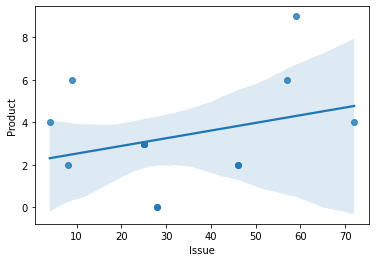

In [ ]:
#select a sample of the dataset
simple_linear_reg_df = df[['Issue', 'Product']].sample(15, random_state=2)
#regression plot
sns.regplot(x="Issue", y="Product", data=simple_linear_reg_df)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
clusters = [[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 150, centers = clusters, cluster_std = 0.60)

In [ ]:
ms = MeanShift()
ms.fit(X)
cluster_centers = ms.cluster_centers_

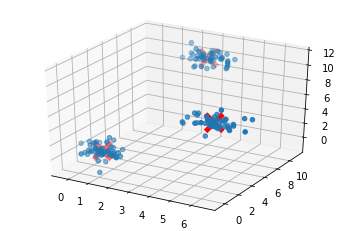

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv('cleaned_data.csv')
df['Timely response?']=df['Timely response?'].astype('category').cat.codes
df['Issue']=df['Issue'].astype('category').cat.codes
df.corr()

,Unnamed: 0,Issue,Timely response?,Complaint ID
Unnamed: 0,1.000000,-0.119777,-0.049283,-0.987454
Issue,-0.119777,1.000000,0.028959,0.134146
Timely response?,-0.049283,0.028959,1.000000,0.050099
Complaint ID,-0.987454,0.134146,0.050099,1.000000


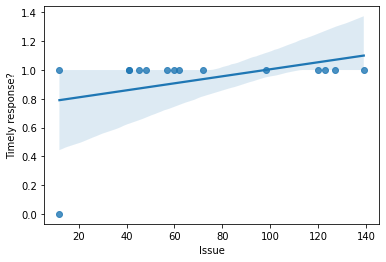

In [ ]:
#select a sample of the dataset
simple_linear_reg_df = df[['Issue', 'Timely response?']].sample(15, random_state=2)
#regression plot
sns.regplot(x="Issue", y="Timely response?", data=simple_linear_reg_df)


In [ ]:
import pandas as pd
df = pd.read_csv('cleaned_data.csv')
df['State']=df['State'].astype('category').cat.codes
df['Issue']=df['Issue'].astype('category').cat.codes
df['Company']=df['Company'].astype('category').cat.codes
df['Product']=df['Product'].astype('category').cat.codes
df.corr()

,Unnamed: 0,Product,Issue,Company,State,Complaint ID
Unnamed: 0,1.000000,0.124892,-0.166417,0.012629,0.023975,-0.984141
Product,0.124892,1.000000,0.102364,0.093906,0.004234,-0.122683
Issue,-0.166417,0.102364,1.000000,0.034331,-0.005798,0.163572
Company,0.012629,0.093906,0.034331,1.000000,-0.000703,-0.012811
State,0.023975,0.004234,-0.005798,-0.000703,1.000000,-0.023257
Complaint ID,-0.984141,-0.122683,0.163572,-0.012811,-0.023257,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Issue'] = df['Issue'].astype('category')
df['Product'] = df['Product'].astype('category')
        
df[['Issue', 'Product']] =  df[['Issue', 'Product']].apply(LabelEncoder().fit_transform)

In [ ]:
df = pd.get_dummies(df, columns = ['Issue', 'Product', 'State'], prefix="", drop_first=True)
df.head()

,Unnamed: 0,Date received,Sub-product,Sub-issue,Company,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,...,_TX,_UNITED STATES MINOR OUTLYING ISLANDS,_UT,_VA,_VI,_VT,_WA,_WI,_WV,_WY
0,0,2019-05-10,Checking account,Problem using a debit or ATM card,NAVY FEDERAL CREDIT UNION,328XX,NaN,Web,2019-05-10,In progress,...,0,0,0,0,0,0,0,0,0,0
1,1,2019-05-10,Other banking product or service,Deposits and withdrawals,BOEING EMPLOYEES CREDIT UNION,98204,NaN,Referral,2019-05-10,Closed with explanation,...,0,0,0,0,0,0,1,0,0,0
2,2,2019-05-10,Payday loan debt,Keep getting calls about your loan,CURO INTERMEDIATE HOLDINGS,751XX,NaN,Web,2019-05-10,Closed with explanation,...,1,0,0,0,0,0,0,0,0,0
3,3,2019-05-10,Credit reporting,Old information reappears or never goes away,AD ASTRA RECOVERY SERVICES INC,708XX,NaN,Web,2019-05-10,Closed with explanation,...,0,0,0,0,0,0,0,0,0,0
4,4,2019-05-10,Checking account,Banking errors,ALLY FINANCIAL INC.,85205,NaN,Postal mail,2019-05-10,In progress,...,0,0,0,0,0,0,0,0,0,0
